# *TP1 Inteligencia Artificial*
## Dataset: Clientes


Cada fila representa un cliente, cada columna contiene atributos de este. 

La columna *Churn* indica si el cliente dejo de utilizar el servicio o no.

clientes | atributos
:----:   | :----:
7043     | 21

## 1. Identificar el tipo/clase de problema

Dado el dataset obtenido queremos saber si futuros clientes seguiran utilizando el servicio o no. Para eso vamos a usar algoritmos de clasificacion


## 2. Identificar las variables y sus características. Describirlas.

# Variables

Nombre   | Descripción  | Posibles valores | Tipo de Variable
:------- | :-----       | :---: | :---:
customerID | Identificación del cliente | (...) | No Aplica
gender | Género del cliente | (...) | Categorica
SeniorCitizen | Es un adulto mayor | (1,0) | Categorica
Partner | Tiene un socio | (Yes, No) | Categorica
Dependents | Tiene dependientes o no | (Yes, No) | Categorica
Tenure | Número de meses que el cliente permaneció en la empresa | (...) | Numerica
PhoneService | Servicio de telefonía asociado | (Yes, No) | Categorica
MultipleLines | Si tiene múltiple líneas de telefonía | (Yes, No, No phone service) | Categorica
InternetService | Tipo de servicio de internet | (DSL, Fiber optic, No) | Categorica
OnlineSecurity | El cliente solicitó servicio de seguridad online | (Yes, No, No internet service) | Categorica
OnlineBackup | Servicio de backup online brindado | (Yes, No, No internet service) | Categorica
DeviceProtection | Servicio de protección de dispositivos móviles | (Yes, No, No internet service) | Categorica
TechSupport | Servicio de soporte extendido | (Yes, No, No internet service) | Categorica
StreamingTV | Servicio de streaming TV | (Yes, No, No internet service) | Categorica
StreamingMovies | Servicio de streaming de películas | (Yes, No, No internet service) | Categorica
Contract | Tipo de contrato, plazo | (Month-to-month, One year, Two year) | Categorica
PaperlessBilling | Factura online | (Yes, No) | Categorica
PaymentMethod | Método de pago | (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) | Categorica
MonthlyCharges | Valor facturado mensualmente | (...) | Numerica
TotalCharges | Total facturado al cliente | (...) | Numerica
Churn | El cliente se dio de baja del servicio | (Yes, No) | Categorica

## 3. Realizar la tarea de preprocesamiento en caso de que fuese necesario. Limpieza de variables, normalización, categorización, remuestreo, binarización, categorización, etc.

In [16]:
# Cargamos la data con panda. Panda nos facilita el cargado de data mixto (numerico y categorico)
# Referencia: https://stackoverflow.com/questions/11023411/how-to-import-csv-data-file-into-scikit-learn
import pandas as pd
dataset = pd.read_csv('./Cliente.csv', sep=',')
dataset.describe(include='all')


# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Chequeamos que nuestro dataset no tenga valores nulos ni clientes duplicados
from tokenize import String

dataset.drop('customerID', inplace=True, axis=1) #El id no me aporta nada

dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors = 'coerce')
dataset  = dataset.dropna() 

dataset.select_dtypes('object').info()
dataset.drop_duplicates(keep = False, inplace = True)
dataset.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   Partner           7032 non-null   object
 2   Dependents        7032 non-null   object
 3   PhoneService      7032 non-null   object
 4   MultipleLines     7032 non-null   object
 5   InternetService   7032 non-null   object
 6   OnlineSecurity    7032 non-null   object
 7   OnlineBackup      7032 non-null   object
 8   DeviceProtection  7032 non-null   object
 9   TechSupport       7032 non-null   object
 10  StreamingTV       7032 non-null   object
 11  StreamingMovies   7032 non-null   object
 12  Contract          7032 non-null   object
 13  PaperlessBilling  7032 non-null   object
 14  PaymentMethod     7032 non-null   object
 15  Churn             7032 non-null   object
dtypes: object(16)
memory usage: 933.9+ KB


(6990, 20)

In [18]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

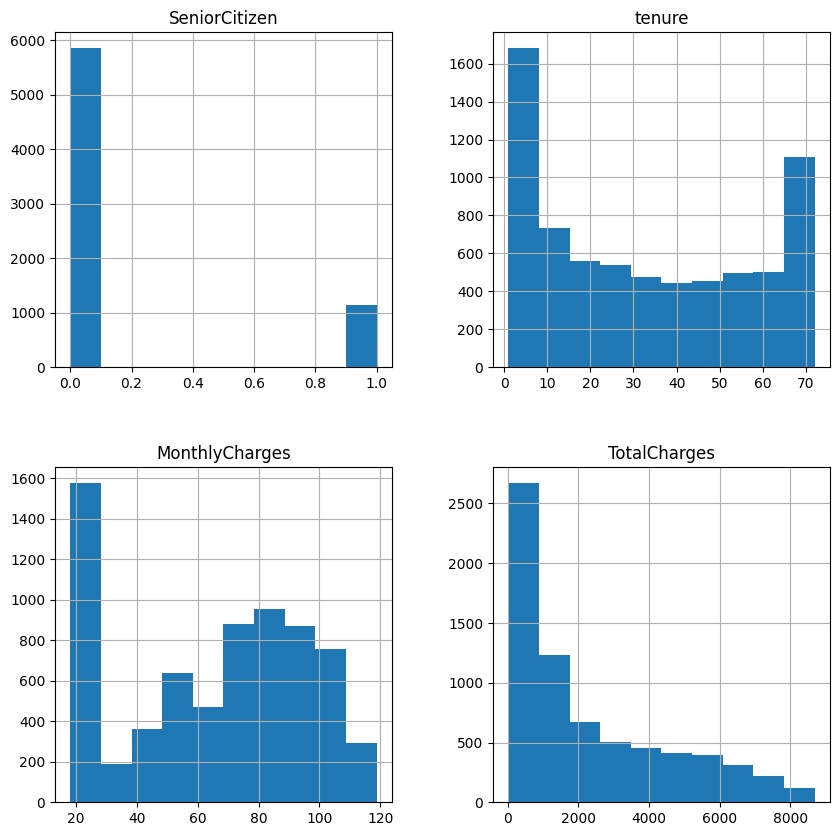

In [19]:
#grafico la distribucion de las variables (solo 3 son numericas )
import matplotlib.pyplot as plt

dataset.hist(figsize=(10,10))
plt.show()

<AxesSubplot: >

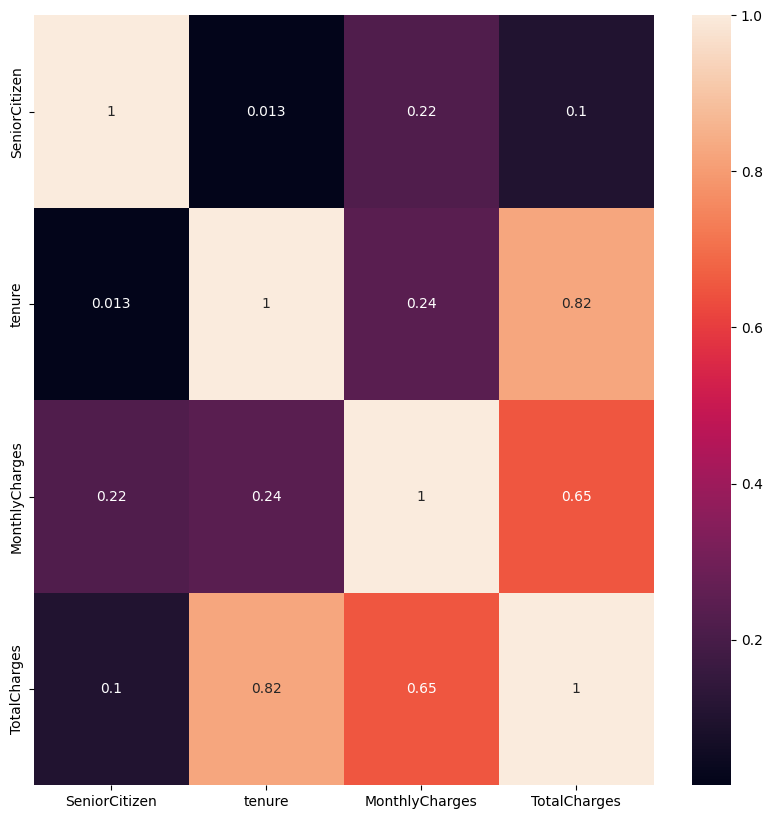

In [20]:
# Heatmap para describir la correlacion de variables
# Referencia: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax, annot=True)

In [21]:
from sklearn.preprocessing import LabelEncoder

# Necesitamos que todos nuestros datos sean numericos, asi que haremos uso de la tecnica de encoding
# Referencia: https://pbpython.com/categorical-encoding.html
# Podriamos realizar el encoding manualmente reemplazando valores, por simplicidad usaremos un algoritmo que lo haga por nosotros.

print(f"Categorias unicas por variable: \n{dataset.nunique()}")
dataset = pd.get_dummies(dataset, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport' ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

# LabelEnconder solo se usa para churn, tal como indica la documentacion de scikit.
labelEncoder = LabelEncoder()
dataset['Churn'] = labelEncoder.fit_transform(dataset['Churn'])

dataset.head()

Categorias unicas por variable: 
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6528
Churn                  2
dtype: int64


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## 4. Aplicar al menos tres (3) modelos de Machine Learning distintos para el problema identificado.
* Formalizar una técnica de selección de los datos.
* Evaluar cada modelo según los resultados obtenidos.
* Comentar las ventajas y limitación de los modelos elegidos.

Aplicaremos los siguientes modelos:

1. Regresion logistica.
2. Gradient Boosting Machines.
3. Neural Networks.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

X = dataset.drop(columns = 'Churn',axis=1).values
y = dataset['Churn'].values

# Hacemos el split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standard Scaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 1. Arboles de decision

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

##si hago pre-prunning para mejorar el overfitting

tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))



Accuracy on training set: 0.998
Accuracy on test set: 0.715
Accuracy on training set: 0.815
Accuracy on test set: 0.786


## 2.Regresion Logistica

In [24]:
from sklearn.linear_model import LogisticRegression

# Primera corrida ingenua
logistic = LogisticRegression(random_state=22, solver='saga')
logistic.fit(X_train, y_train)

print(f'La precision de nuestro modelo sobre el training set es {logistic.score(X_train, y_train):.4f}')
print(f'La precision de nuestro modelo sobre el test set es {logistic.score(X_test, y_test):.4f}')

La precision de nuestro modelo sobre el training set es 0.8036
La precision de nuestro modelo sobre el test set es 0.8069


In [25]:
# Probamos usar gridsearch para buscar los mejores hiperparametros
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2', random_state=22, solver='saga'), param_grid, scoring='accuracy', verbose=True)

result = clf.fit(X_train, y_train)
print(f'\nLa precision de nuestro modelo sobre el training set es {clf.score(X_train, y_train):.4f}')
print(f'La precision de nuestro modelo sobre el test set es {clf.score(X_test, y_test):.4f}')

print("El mejor score es: %f usando %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits

La precision de nuestro modelo sobre el training set es 0.8051
La precision de nuestro modelo sobre el test set es 0.8097
El mejor score es: 0.803112 usando {'C': 10}


## 3. Árboles de Decisión Aumentados por Gradiente (Gradient Boosting Machines)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# Primera corrida ingenua
gradient = GradientBoostingClassifier()
gradient.fit(X_train, y_train)

print(f'Accuracy en el training set: {gradient.score(X_train, y_train):.4f}')
print(f'Accuracy en el test set: {gradient.score(X_test, y_test):.4f}')

Accuracy en el training set: 0.8294
Accuracy en el test set: 0.8126


In [27]:
# Probamos usar gridsearch para buscar los mejores hiperparametros
from sklearn.utils import parallel_backend

param_grid = {'n_estimators': [10, 50, 100, 500],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
              'subsample': [0.5, 0.7, 1.0],
              'max_depth': [3, 7, 9] }



clf = GridSearchCV(GradientBoostingClassifier(), param_grid, n_jobs=-1 ,scoring='accuracy', verbose=2)
result = clf.fit(X_train, y_train)

print("El mejor score es: %f usando %s" % (result.best_score_, result.best_params_))

means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) con: %r" % (mean, stdev, param))

print(f'Accuracy en el training set: {clf.score(X_train, y_train):.4f}')
print(f'Accuracy en el test set: {clf.score(X_test, y_test):.4f}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
El mejor score es: 0.803827 usando {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.738734 (0.000301) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10}
0.738734 (0.000301) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50}
0.738734 (0.000301) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100}
0.738734 (0.000301) con: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 500}
0.738734 (0.000301) con: {'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 10}
0.738734 (0.000301) con: {'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 50}
0.738734 (0.000301) con: {'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 100}
0.738734 (0.000301) con: {'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 500}
0.738734 (0.000301) con: {'learning_rate': 0.0001, 'max_depth': 9, 'n_estimators': 10}
0.738734 (0.000301) con: {'learning_rate': 0.0001, 'max